<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/stanbaek/ece487/blob/main/docs/Labs/ICE4_SpatialMath.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

# ❄️ ICE4: Spatial Math for Python

<hr>

**A note on this document**
This document is known as a Jupyter notebook; it is used in academia and industry to allow text and executable code to coexist in a very easy to read format. Blocks can contain text or executable code. To run the executable code in this notebook, click <a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/stanbaek/ece487/blob/main/docs/Labs/ICE4_SpatialMath.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>
. For blocks containing code, press `Shift + Enter`, `Ctrl+Enter`, or click the arrow on the block to run the code. Earlier blocks of code need to be run for the later blocks of code to work.

## Introduction
This in-class exercise will introduce the spatialmath package that will be used throughout the semester to control robotic arms.

### Documentation
This in-class exercise has been adapted from the Spatial Math for Python.  Refer to the follwing links for more details.

- [Spatial Maths for Python](https://petercorke.github.io/spatialmath-python/)
- [spatialmath-python github](https://github.com/petercorke/spatialmath-python)


## Low-Level Spatial Math Functions

### Transformation Matrices in 2D

First, import the **low-level** transform functions

In [1]:
from spatialmath.base import *  # import low-level functions
import numpy as np

In [2]:
# We can create a rotation matrix in 2-dimensional space
R = rot2(np.pi/4) # the angle is specified in radians.
print(R)

# The object type of R can be found by
print(type(R))
# R is a numpy.ndarray object

# We can find the determinant of the matrix such as
d = np.linalg.det(R)
print(d)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
<class 'numpy.ndarray'>
1.0


As it is expected, R is a 2 by 2 matrix that is a `numpy.ndarray` object. 

```{important} The objects returned by the **low-level** spatialmath functions are numpy arrays.
```

We can also create a homogeneous transformation matrix in 2-D that is a 3 by 3 matrix.

In [4]:
# Homogeneous transformation matrix for a rotation of 30 deg
T = trot2(30, 'deg')
print(T)

# Create a homogeneous transformation in 2-D that represents 
# a translation of (1,2) followed by a rotation of 45 deg
T1 = transl2(1,2)@trot2(np.pi/4)   # It is trans-'el'-2 not trans-one-2
print(T1)

type(T1)

[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
[[ 0.70710678 -0.70710678  1.        ]
 [ 0.70710678  0.70710678  2.        ]
 [ 0.          0.          1.        ]]


numpy.ndarray

```{note}
`*` is for element-wise multiplication whereas `@` is for matrix multiplication.
```

The function `transl2` creates a relative pose with a finite translation but zero rotation, while `trot2` creates a relative pose with a finite rotation but zero translation.  We can plot this, relative to the world coordinate frame, by

<AxesSubplot:xlabel='X', ylabel='X'>

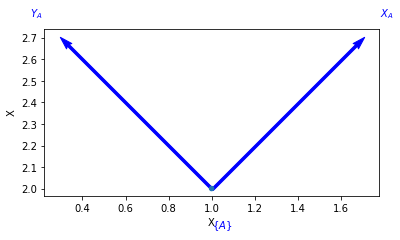

In [5]:
trplot2(T1, frame='A')

If it does not display a plot in PyCharm, you need to install matplotlib package.  Go to `File > Settings > Project > Python Interpreter`. Click `+` to install `matplotlib`. Once installation is complete add to your code
```
import matplotlib.pyplot as plt
```
and after the `trplot2()` function add
```
plt.show()
```

Use `plotvol2` to modify the plot area

<AxesSubplot:xlabel='X', ylabel='Y'>

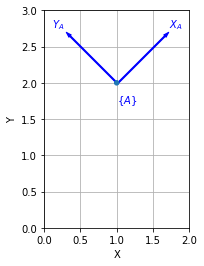

In [6]:
trplot2(T1, frame='A')
plotvol2([0,2,0,3], grid=True)  # axis dimension: x = [0,2], y=[0,3] 

We can run `help` function to learn details of these functions by

```Python
help(trplot2)
```

We can create another relative pose which is a displacement of (2,1) and zero rotation

In [8]:
T2 = transl2(2,1)
print(T2)

[[1. 0. 2.]
 [0. 1. 1.]
 [0. 0. 1.]]


Now we can compose the two relative poses

In [9]:
T3 = T1@T2
print(T3)

[[ 0.70710678 -0.70710678  1.70710678]
 [ 0.70710678  0.70710678  4.12132034]
 [ 0.          0.          1.        ]]


and plot them as

<AxesSubplot:xlabel='X', ylabel='Y'>

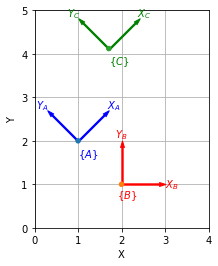

In [10]:
trplot2(T1, frame='A', width=1)
trplot2(T2, frame='B', color='red', width=1)
trplot2(T3, frame='C', color='green', width=1)
plotvol2([0,4,0,5], grid=True)

```{note}
Notice that the displacement of (2,1) has been applied with respect to frame {A}.  It is important to note that the final displacement is not (3,3) because the displacement is with respect to the rotated coordinate frame. 
```

The noncommutativity of composition is clearly demonstrated by 

<AxesSubplot:xlabel='X', ylabel='Y'>

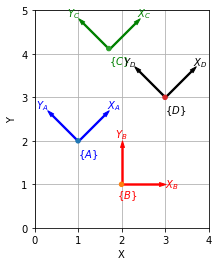

In [11]:
T4 = T2@T1
trplot2(T1, frame='A', width=1)
trplot2(T2, frame='B', color='red', width=1)
trplot2(T3, frame='C', color='green', width=1)
trplot2(T4, frame='D', color='black')
plotvol2([0,4,0,5], grid=True)

and we can see that Frame {D} is different to Frame {C}. 

Now we can define a point $[3,2]^\top$ relative to the world frame (Frame {0})

In [12]:
P_0 = np.array([3,2]).reshape([2,1])  # it must be a 2 by 1 column vector 
print(P_0)

[[3]
 [2]]


which is a column vector.

We can determine the coordinate of the point with respect to {A} by
$$^0\tilde{\mathbf{p}} = {^0T}_A {^A\tilde{\mathbf{p}}} $$
and then rearrange as
$${^A\tilde{\mathbf{p}}} = {^AT_0} {^0\tilde{\mathbf{p}}} = {^0T^{-1}_A} {^0\tilde{\mathbf{p}}} $$
Substituting numeric values

In [13]:
p_0 = e2h(P_0)  # convert from Euclidean to homogeneous form
print(p_0)
p_A = np.linalg.inv(T1)@p_0
print(p_A)

[[3.]
 [2.]
 [1.]]
[[ 1.41421356]
 [-1.41421356]
 [ 1.        ]]


where we first convert the Euclidean point coordinates to homogeneous form by appending a one. The result is also in homogeneous form and has a negative y-coordinate in frame {A}.  Using `h2e` we could also have expressed this as 

In [14]:
P_A = h2e(np.linalg.inv(T1)@p_0)
print(P_A)

[[ 1.41421356]
 [-1.41421356]]


You can use `set_printoptions` to change the way foating point numbers and numpy arrays are displayed

In [15]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
print(P_A)

[[1.41]
 [-1.41]]


###	Transformation Matrices in 3D

The spatial maths package provides functions to compute rotation matrices in 3D, for example $R_X(\theta)$ is

In [17]:
R = rotx(np.pi/2)
print(R)

[[1.00 0.00 0.00]
 [0.00 0.00 -1.00]
 [0.00 1.00 0.00]]


The function `rotx` returns the rotation matrix that rotates a point around the x-axis for an input in radians. The functions `roty` and `rotz` compute $R_Y(\theta)$ and $R_Z(\theta)$, respectively.  The corresponding coordinate frame can be displayed graphically

<Axes3DSubplot:xlabel='X', ylabel='X'>

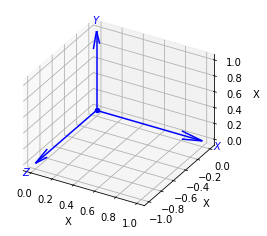

In [18]:
trplot(R)

To illustrate compounding of rotations we will rotate the frame again, this time around its y-axis

[[0.00 0.00 1.00]
 [1.00 0.00 -0.00]
 [-0.00 1.00 0.00]]


<Axes3DSubplot:xlabel='X', ylabel='X'>

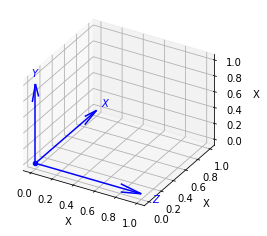

In [19]:
R = rotx(np.pi/2)@roty(90, 'deg')
print(R)
trplot(R)

The non-commutativity of rotation can be shown by reversing the order of the rotations:

[[0.00 1.00 0.00]
 [0.00 0.00 -1.00]
 [-1.00 0.00 0.00]]


<Axes3DSubplot:xlabel='X', ylabel='X'>

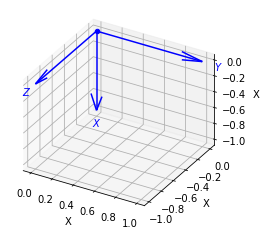

In [20]:
R = roty(np.pi/2)@rotx(np.pi/2)
print(R)
trplot(R)

The ZYX Euler angles $R=R_Z(\psi)R_Y(\theta)R_X(\phi)$ is commonly used in robotic arms. The Euler angles are the 3-vector $(\psi, \theta, \phi)$. For example, to compute the equivalent rotation matrix for $(60^\circ, 45^\circ, 30^\circ)$ we write


In [21]:
Rzyx = rotz(np.pi/6)@roty(np.pi/4)@rotx(np.pi/3)
print(Rzyx)

[[0.61 0.28 0.74]
 [0.35 0.74 -0.57]
 [-0.71 0.61 0.35]]


or more conveniently

In [22]:
Rzyx = rpy2r(np.pi/3, np.pi/4, np.pi/6)  # roll-pitch-yaw to rotation matrix
print(Rzyx)

[[0.61 0.28 0.74]
 [0.35 0.74 -0.57]
 [-0.71 0.61 0.35]]


The function `rpy2r(alpha, beta, gamma)` transforms roll-pitch-yaw angles to a rotation matrix. The default is ZYX Euler angles - rotate by gamma about the z-axis, then by beta about the new y-axis, then by alpha about the new x-axis.  The inverse is

In [23]:
rpy = tr2rpy(Rzyx)
print(rpy)

[1.05 0.79 0.52]


in radians or

In [24]:
rpy = tr2rpy(Rzyx, unit='deg')
print(rpy)

[60.00 45.00 30.00]


in degrees.  To compute the rotation matrix for XYZ Euler angles with $(60^\circ, 45^\circ, 30^\circ)$ we write

In [25]:
Rxyz = rotx(np.pi/6)@roty(np.pi/4)@rotz(np.pi/3)
print(Rxyz)

[[0.35 -0.61 0.71]
 [0.93 0.13 -0.35]
 [0.13 0.78 0.61]]


or

In [26]:
Rxyz = rpy2r(np.pi/3, np.pi/4, np.pi/6, order='xyz')
print(Rxyz)

[[0.35 -0.61 0.71]
 [0.93 0.13 -0.35]
 [0.13 0.78 0.61]]


The inverse is

In [27]:
rpy = tr2rpy(R, unit='deg', order='xyz')
print(rpy)

[-90.00 0.00 90.00]


A homogeneous transformation matrix can be implemented by

In [28]:
T = rpy2tr(0, 90, 0, unit='deg', order='zyx')
print(T)

[[0.00 0.00 1.00 0.00]
 [0.00 1.00 0.00 0.00]
 [-1.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 1.00]]


which is a 4 by 4 matrix. We can extract the Euler angles by

In [29]:
rpy = tr2rpy(T, unit='deg')
print(rpy)

[0.00 90.00 -0.00]


The `trplot` function supports various plotting styles as follows.

<Axes3DSubplot:xlabel='X', ylabel='Y'>

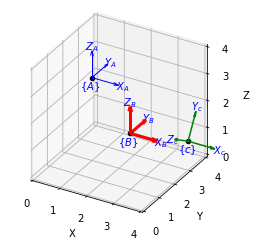

In [30]:
trplot( transl(1,2,3), frame='A', rviz=True, width=1)
trplot( transl(3,1, 2), color='red', width=3, frame='B')
trplot( transl(4, 3, 1)@trotx(np.pi/3), color='green', frame='c', dims=[0,4,0,4,0,4])

We can visualize a rotation more powerfully using the `tranimate` function which animates a rotation

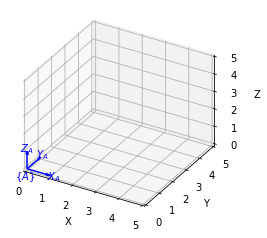

In [31]:
# Jupyter notebook cannot properly animate transformation matrices. 
# You must run it in PyCharm. 
T = transl(4, 3, 4)@trotx(2)@troty(-2)
tranimate(T, frame='A', dims=[0, 5], nframes=200)

showing the world frame rotating into the specified coordinate frame.  You can also save the animation to a file by

```Python
tranimate(T, frame='A', dims=[0, 5], nframes=200, movie='out.mp4')
```

## High-Level Spatial Math Functions


The spatialmath package supports high-level classes that abstract the low-level numpy arrays into objects.  These objects obey the rules associated with the mathematical groups SO(2), SE(2), SO(3), SE(3), twists, and quaternioins.

To create an object representing a rotation of 90 degrees about the x-axis is

In [3]:
import numpy as np
from spatialmath import *  # import high-lelel spatialmath functions

R1 = SO3.Rx(np.pi/2)
print(R1)

   1         0         0         
   0         0        -1         
   0         1         0         



The object type of R1 can be found by

In [4]:
type(R1)

spatialmath.pose3d.SO3


```{important} The objest returned by the **high-level** spatialmath functions are *not* numpy arrays.
```



The functions we used earlier, such as `rotx`, `roty`, `rotz`, `rpy2r`, returned the numpy `array` type. The compounding of rotations can be found by

In [5]:
Rx = SO3.Rx(np.pi/2)
Ry = SO3.Ry(np.pi/2)
R = Rx * Ry    # We use * not @ for matrix multiplication for SO3 objects.
print(R)

   0         0         1         
   1         0         0         
   0         1         0         



Note that we use `*` for matrix multiplication. We can find the corresponding Euler angles

In [6]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
print(R.eul('deg'))  # eul returns ZYZ Euler angles
print(R.rpy('deg'))  # rpy return ZYX Euler angles in roll(x)-pitch(y)-yaw(z) order.   

[-0.00 90.00 90.00]
[90.00 0.00 90.00]


In [9]:
R = SO3.Rz(30, 'deg')*SO3.Ry(45, 'deg')*SO3.Rx(60, 'deg')
print(R.rpy('deg')) # return roll(x), pitch(y), and yaw(z)

[60.00 45.00 30.00]


In [11]:
print(R.rpy('deg', 'xyz')) # return XYZ Euler angles in roll(x)-pitch(y)-yaw(z) order.   

[-24.60 47.66 58.33]


A pure translation in 3-D can be represented by

In [38]:
T = SE3(1,2,3)  # Special Euclidean group.
print(T)

   1         0         0         1         
   0         1         0         2         
   0         0         1         3         
   0         0         0         1         



which is a 4 by 4 matrix. A transformation matrix representing a translation followed by a rotation can be obtained by

In [39]:
T = SE3(1,2,3)*SE3.Rx(30, 'deg')
print(T)

   1         0         0         1         
   0         0.866    -0.5       2         
   0         0.5       0.866     3         
   0         0         0         1         



A rotation followed by a translation in 3-D can be obtained by

In [40]:
T = SE3.Rx(30, 'deg')*SE3(1,2,3)
print(T)

   1         0         0         1         
   0         0.866    -0.5       0.2321    
   0         0.5       0.866     3.598     
   0         0         0         1         



which is different than a translation followed by a rotation. 

```{note}
We used `SE3.Rx()` not `SO3.Rx()`.  `SE3.Rx()` returns a 4 by 4 SE(3) matrix whereas `SO3.Rx()` returns 3 by 3 SO(3) matrix.
```

We can print the pose (position and orientation) by

In [41]:
T.printline()

t = 1, 0.232, 3.6; rpy/zyx = 30°, 0°, 0°


```{hint}
Do not use `print(T) if you want to print the pose.  Instead, use `T.printline()`.  You still need to use `print(T)` to print the transformation matrix.
```



We can plot the transformation by

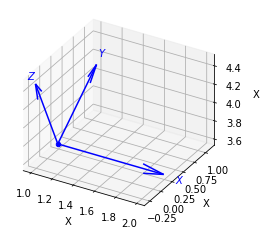

In [42]:
T.plot()

```{tip}
You can find the class/function references of the spatial maths package [here](https://petercorke.github.io/spatialmath-python/)
```

## Deliverables

**Submit your code to Bitbucket and provide the outputs in Gradescope.**

### Deliverable 1

For this exercise, use `spatialmath_ex1.py` in your local repository.

Using the ZYX Euler angles, find the rotation matrix $R_{ZYX}(\psi,\theta,\phi)$ for $\psi=45^\circ, \theta=60^\circ, \phi=45^\circ$.

(i) Use low-level spatial math functions to find $R_{ZYX}$ and the Euler angles from $R_{ZYX}$.

(ii) Use high-level spatial math functions to find $R_{ZYX}$ and the Euler angles from $R_{ZYX}$.

Did you get the same Euler angles, $\psi$, $\theta$, and $\phi$?  If not, explain why.  


### Deliverable 2

For this exercise, use `spatialmath_ex2.py` in your local repository.

Using the ZYX Euler angles, find the rotation matrix $R_{ZYX}(\psi,\theta,\phi)$ for $\psi=45^\circ, \theta=90^\circ, \phi=45^\circ$. 

(i) Use low-level spatial math functions to find $R_{ZYX}$ and the Euler angles from $R_{ZYX}$.

(ii) Use high-level spatial math functions to find $R_{ZYX}$ and the Euler angles from $R_{ZYX}$.

Did you get the same Euler angles, $\psi$, $\theta$, and $\phi$?  If not, explain why.  

### Deliverable 3
Shown below is the 3 DoF revolute-revolute-revolute (RRR) robotic arm we discussed in Lesson 21.

```{image} ./figures/RRR.png
:width: 760
:align: center
```

Download `RRR.py` from Teams > General > Files > Class Materials > Python Files.  Complete the `forkine` function for the robot.  Use the D-H table to construct the transformation matrices.

Push your code to your repository using git. 
